In [1]:
import moderngl
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
%%file default.vert
#version 330

in vec2 in_vert;
in vec3 in_color;

out vec3 v_color;

void main() {

    v_color = in_color;
    gl_Position = vec4(in_vert, 0.0, 1.0);
}

Overwriting default.vert


In [3]:
%%file default.frag
#version 330

in vec3 v_color;
out vec3 f_color;

void main() {
   f_color = v_color;
}

Overwriting default.frag


In [4]:
ctx = moderngl.create_standalone_context()

with open('default.vert') as file:
    vertex_shader = file.read()
    
with open('default.frag') as file:
    fragment_shader = file.read()
    
print(vertex_shader + '\n')
print(fragment_shader)

#version 330

in vec2 in_vert;
in vec3 in_color;

out vec3 v_color;

void main() {

    v_color = in_color;
    gl_Position = vec4(in_vert, 0.0, 1.0);
}


#version 330

in vec3 v_color;
out vec3 f_color;

void main() {
   f_color = v_color;
}



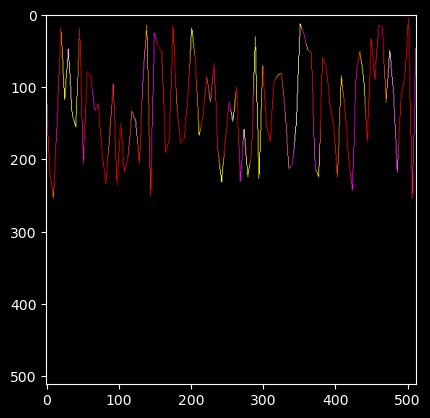

In [5]:
prog = ctx.program(vertex_shader=vertex_shader,fragment_shader=fragment_shader)

num_vert = 100

x = np.linspace(-1, 1, num_vert)
y = np.random.rand(num_vert)
r = np.ones(num_vert)
g = np.random.randn(num_vert)
b = np.random.randn(num_vert)
vertices = np.dstack([x, y, r, g, b])

vbo = ctx.buffer(vertices.astype('f4').tobytes())
vao = ctx.simple_vertex_array(prog, vbo, 'in_vert', 'in_color')
fbo = ctx.simple_framebuffer((512, 512))
fbo.use()
fbo.clear(.0, .0, .0, 1.0)

vao.render(moderngl.LINE_STRIP)

plt.imshow(Image.frombytes('RGB', fbo.size, fbo.read(), 'raw', 'RGB', 0, -1))

In [6]:
import numpy as np

In [7]:
def get_vertex_data():
        vertices = np.array([(-1, -1, 1), (1, -1, 1), (1, 1, 1), (-1, 1, 1),
                             (-1, 1, -1), (-1, -1, -1), (1, -1, -1), (1, 1, -1)], dtype='f4')
        indices = [(0, 2, 3), (0, 1, 2),
                   (1, 7, 2), (1, 6, 7),
                   (6, 5, 4), (4, 7, 6),
                   (3, 4, 5), (3, 5, 0),
                   (3, 7, 4), (3, 2, 7),
                   (0, 6, 1), (0, 5, 6)]
        
        return get_data(vertices, indices)

@staticmethod
def get_data(vertices, indices):
    return np.array([vertices[ind] for triangle in indices for ind in triangle], dtype='f4') 

get_vertex_data()

array([[-1., -1.,  1.],
       [ 1.,  1.,  1.],
       [-1.,  1.,  1.],
       [-1., -1.,  1.],
       [ 1., -1.,  1.],
       [ 1.,  1.,  1.],
       [ 1., -1.,  1.],
       [ 1.,  1., -1.],
       [ 1.,  1.,  1.],
       [ 1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1.,  1., -1.],
       [ 1., -1., -1.],
       [-1., -1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1.,  1., -1.],
       [ 1., -1., -1.],
       [-1.,  1.,  1.],
       [-1.,  1., -1.],
       [-1., -1., -1.],
       [-1.,  1.,  1.],
       [-1., -1., -1.],
       [-1., -1.,  1.],
       [-1.,  1.,  1.],
       [ 1.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1., -1.],
       [ 1., -1., -1.]], dtype=float32)

In [8]:
#defining 3d structures like this requires a closer look

vertices_ = [(-1, -1,  1), ( 1,  -1,  1), ( 1,  1,  1), (-1,  1,  1),
             (-1,  1, -1), (-1,  -1, -1), ( 1, -1, -1), ( 1,  1, -1)]
indices = [(0, 2, 3), (0, 1, 2),
           (1, 7, 2), (1, 6, 7),
           (6, 5, 4), (4, 7, 6),
           (3, 4, 5), (3, 5, 0),
           (3, 7, 4), (3, 2, 7),
           (0, 6, 1), (0, 5, 6)]


tex_coord = [(0, 0), (1, 0), (1, 1), (0, 1)]
tex_coord_ind = [(0, 2, 3), (0, 1, 2),
                 (0, 2, 3), (0, 1, 2),
                 (0, 1, 2), (2, 3, 0),
                 (2, 3, 0), (2, 0, 1),
                 (0, 2, 3), (0, 1, 2),
                 (3, 1, 2), (3, 0, 1),]

In [9]:
def get_data(vertices, indices):
    data = [vertices[ind] for triangle in indices for ind in triangle]
    return np.array(data, dtype='f4') 

In [10]:
get_data(tex_coord, tex_coord_ind)

array([[0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.]], dtype=float32)

In [11]:
def get_data(vert, ind):
    L = []
    for triangle in ind:
        for ind in triangle:
            L.append(vert[ind])      
    return np.array(L, dtype='f4')